In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-23 07:29:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2024-07-23 07:29:39 (1.68 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd
df = pd.read_csv('/content/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.corr(numeric_only = True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


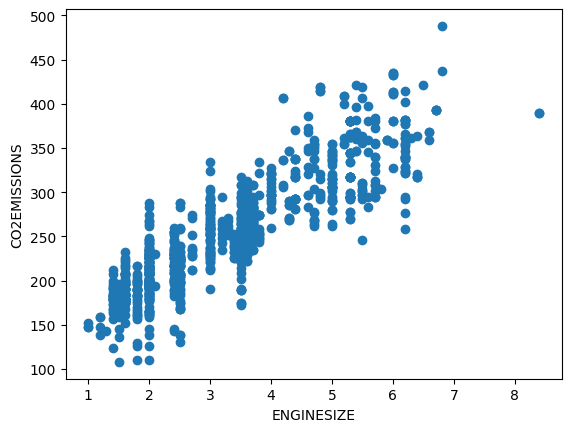

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [ ]:
#divide dataset into train and test

import numpy as np
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

In [ ]:
#modelling - non liner (Polynomial Regression)



**Polynomial Regression**

$$y = b + \theta\_1  x + \theta\_2 x^2$$

LaTex

In [ ]:
#modelling - non liner (Polynomial Regression)

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#polynomial features
poly = PolynomialFeatures(degree = 2)  #2 is the default. how sensitive the curve line to the data. the higher the degree, the more sensitive (following the distribution odf the data)
train_x_poly = poly.fit_transform(train_x)

#linear regression
clf = linear_model.LinearRegression()  #clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
train_y_ = clf.fit(train_x_poly, train_y) #after transform x to poly


#prediction
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)


#evaluation - using r2
from sklearn.metrics import r2_score

print ('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))
print ('The MAE is: ', np.mean(np.absolute(test_y - test_y_)))

The R2 score is:  75.33213220576181
The MSE is:  1049.1371751000854
The MAE is:  24.637982975029562


Text(0, 0.5, 'Emission')

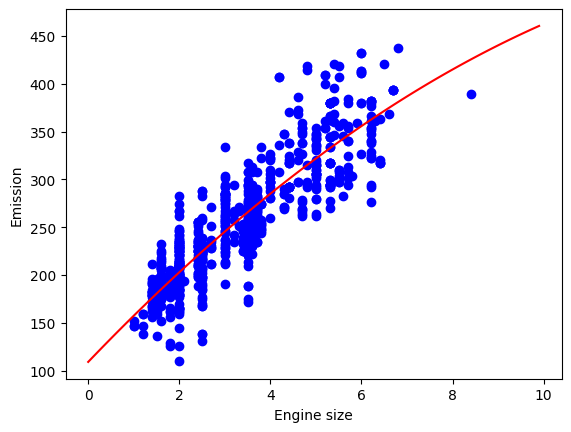

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 10.0, 0.1)  #equation of polynomial degree 2
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#modelling - non liner (Polynomial Regression)

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#polynomial features
poly4 = PolynomialFeatures(degree = 4)  #2 is the default. how sensitive the curve line to the data. the higher the degree, the more sensitive (following the distribution odf the data)
train_x_poly4 = poly4.fit_transform(train_x)

#linear regression
clf4 = linear_model.LinearRegression()  #clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
train_y_ = clf4.fit(train_x_poly4, train_y) #after transform x to poly


#prediction
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


test_x_poly4 = poly4.fit_transform(test_x)
test_y_ = clf4.predict(test_x_poly4)


#evaluation - using r2
from sklearn.metrics import r2_score

print ('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))
print ('The MAE is: ', np.mean(np.absolute(test_y - test_y_)))

The R2 score is:  75.4127854217769
The MSE is:  1045.7069521104604
The MAE is:  24.47293139375248


Text(0, 0.5, 'Emission')

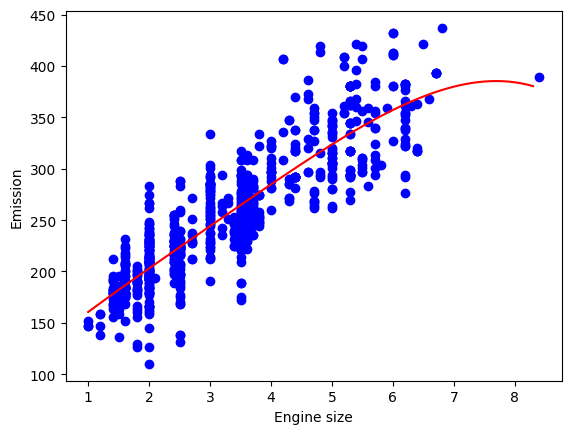

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(train_x.min(), train_x.max(), 0.1)
'''
# This line generates an array of evenly spaced values from 0.0 to 10.0 with a step of 0.1.
# These values will be used as input for generating the predicted CO2 emissions.
'''
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)

'''
# This line calculates the predicted CO2 emissions (yy) using the fitted polynomial regression model (clf4).
# It uses the coefficients of the model (clf4.intercept_ and clf4.coef_) and the input values (XX) to calculate the predicted values.
'''

plt.plot(XX, yy, '-r' )

'''
# This line plots the predicted CO2 emissions (yy) against the input values (XX) as a red line.
# This line represents the fitted polynomial regression curve.
'''
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
# prompt: create a multiple non linear regression ,

# Multiple Non-Linear Regression

# Training
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Polynomial features
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

# Linear regression
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

# Prediction
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

# Evaluation
print('The R2 score is: ', (r2_score(test_y, test_y_)) * 100)
print('The MSE is: ', np.mean((test_y_ - test_y) ** 2))
print('The MAE is: ', np.mean(np.absolute(test_y - test_y_)))


The R2 score is:  89.65068807258089
The MSE is:  440.1615887652124
The MAE is:  12.262717676104941


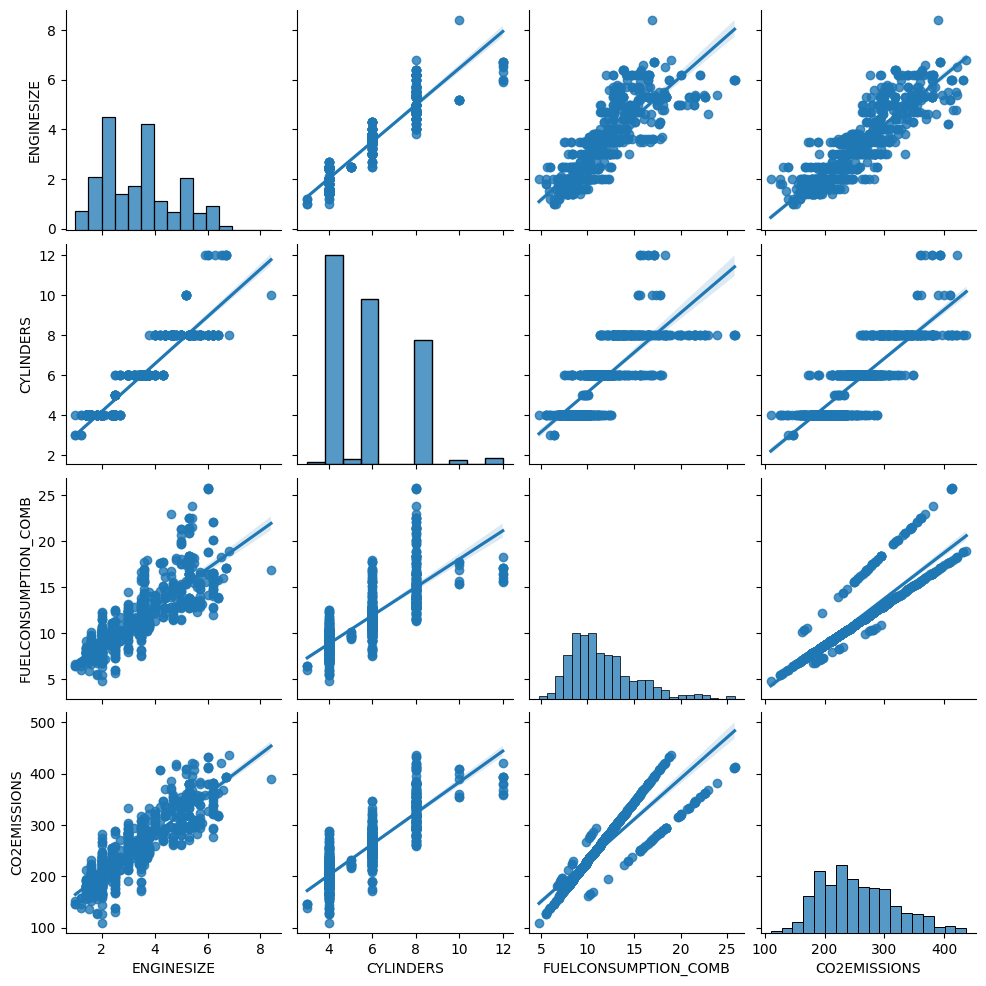

In [ ]:
# prompt: use the pair plot

import seaborn as sns
sns.pairplot(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']],kind='reg')


In [ ]:
# prompt: what can i conclude from this analysis

# Based on the analysis, you can conclude the following:

# 1. Engine Size and CO2 Emissions: There's a strong positive correlation between engine size and CO2 emissions. Larger engines tend to produce more CO2.

# 2. Polynomial Regression Improvement: Using polynomial regression (especially with degree 4) significantly improves the model's fit compared to simple linear regression. This suggests a non-linear relationship between engine size and CO2 emissions.

# 3. Multiple Features Enhance Prediction: Including additional features like cylinders and fuel consumption in a multiple non-linear regression model further improves the predictive accuracy (higher R2 score).

# 4. Model Performance: The chosen polynomial regression models with degrees 2 and 4 demonstrate good predictive performance on the test data, as indicated by the R2 scores, MSE, and MAE values.

# 5. Further Exploration: Consider exploring higher-degree polynomials or other non-linear regression techniques to potentially improve the model even further. Additionally, investigate the impact of other features and data preprocessing techniques.


In [ ]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

The R2 score is:  82.21970261240779
The MSE is:  756.2052435685192
The MAE is:  15.906150051450812


Text(0, 0.5, 'Emission')

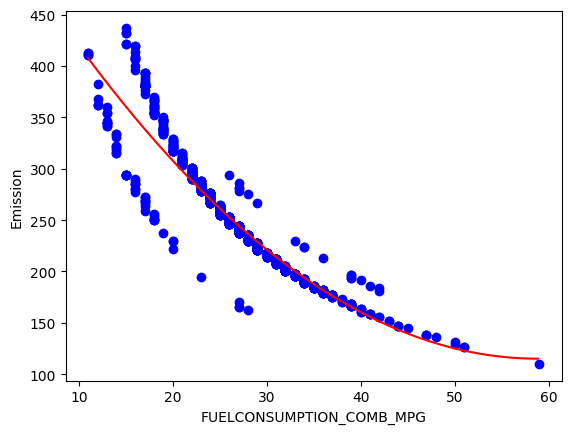

In [ ]:
#modelling - non linear (Polynomial Regression)

#training
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#polynomial features
poly5 = PolynomialFeatures(degree = 2)  #2 is the default. how sensitive the curve line to the data. the higher the degree, the more sensitive (following the distribution odf the data)
train_x_poly5 = poly5.fit_transform(train_x)

#linear regression
clf5 = linear_model.LinearRegression()  #clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
train_y_ = clf5.fit(train_x_poly5, train_y) #after transform x to poly


#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


test_x_poly5 = poly5.fit_transform(test_x)
test_y_ = clf5.predict(test_x_poly5)


#evaluation - using r2
from sklearn.metrics import r2_score

print ('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))
print ('The MAE is: ', np.mean(np.absolute(test_y - test_y_)))

plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='blue')
XX = np.arange(train_x.min(), train_x.max(), 0.1)
yy = clf5.intercept_[0]+ clf5.coef_[0][1]*XX + clf5.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

The R2 score is:  79.68948170582748
The MSE is:  863.8168473135686
The MAE is:  18.76605714210008


Text(0, 0.5, 'Emission')

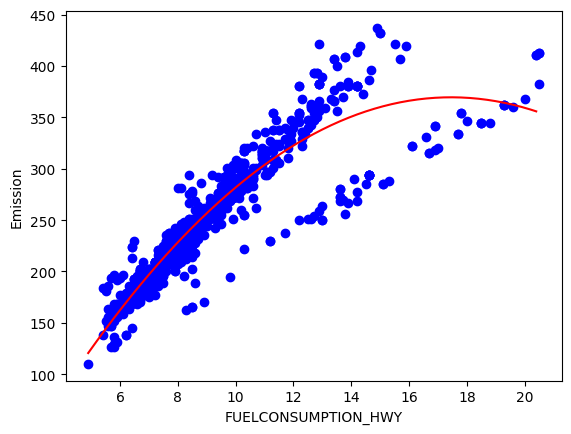

In [ ]:
#modelling - non linear (Polynomial Regression)

#training
train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#polynomial features
poly6 = PolynomialFeatures(degree = 2)  #2 is the default. how sensitive the curve line to the data. the higher the degree, the more sensitive (following the distribution odf the data)
train_x_poly6 = poly6.fit_transform(train_x)

#linear regression
clf6 = linear_model.LinearRegression()  #clf - variable holding the trained model - classifier. it represents the trained linear regression model used for predicting CO2 emissions based on engine size.
train_y_ = clf6.fit(train_x_poly6, train_y) #after transform x to poly


#prediction
test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


test_x_poly6 = poly6.fit_transform(test_x)
test_y_ = clf6.predict(test_x_poly6)


#evaluation - using r2
from sklearn.metrics import r2_score

print ('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))
print ('The MAE is: ', np.mean(np.absolute(test_y - test_y_)))

plt.scatter(train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS,  color='blue')
XX = np.arange(train_x.min(), train_x.max(), 0.1)
yy = clf6.intercept_[0]+ clf6.coef_[0][1]*XX + clf6.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")